# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [1]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...
    
    x_root = x0 - f(x0)/fder(x0)
    
    i = 0
    while abs(x_root - x0) > eps:
        if i > maxiter:
            break
        x0 = x_root
        x_root = x_root - f(x_root)/fder(x_root)
        i += 1
        
    return (x_root, i)

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [2]:
def f(x):
    return x**2 - 1

def fder(x):
    return 2*x

print(newton_iteration(f, fder, 0.5))
print(newton_iteration(f, fder, -0.5))

(1.000000000000001, 4)
(-1.000000000000001, 4)


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [3]:
# ... ENTER YOUR CODE HERE ...
def newton_modified(f, fder, x0, m, eps=1e-5, maxiter=1000):
    x_root = x0 - f(x0)/fder(x0)
    i = 0
    while abs(x_root - x0) > eps:
        if i > maxiter:
            break
        x0 = x_root
        x_root = x_root - m*f(x_root)/fder(x_root)
        i += 1
        
    return (x_root, i)

In [4]:
def f2(x):
    return (x**2 - 1)**2

def f2der(x):
    return 4*(x**2 - 1)*x

In [5]:
for m in range(1, 6):
    print(newton_modified(f2, f2der, -0.5, m), newton_modified(f2, f2der, 0.5, m))

(-0.9999933268860306, 14) (0.9999933268860306, 14)
(-1.0, 4) (1.0, 4)
(-0.9999978588127855, 16) (0.9999978588127855, 16)
(-1.1428571428571428, 1001) (1.1428571428571428, 1001)
(0.7688895208952304, 1001) (-0.7688895208952304, 1001)


As can be seen, the algorithm's convergence is actually quadratic if m equals multiplicity of the root.

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

In [6]:
# ... ENTER YOUR CODE HERE ...
import matplotlib.pyplot as plt
import numpy as np

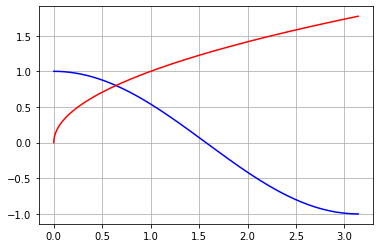

In [7]:
x = np.linspace(0, np.pi, num=1e4)

plt.plot(x, np.cos(x), c='b')
plt.plot(x, x**0.5, c='r')
plt.grid()

It's clearly seen that the root is in [0.5, 1]

In [9]:
def f3(x):
    return x**0.5 - np.cos(x)

In [10]:
def f3der(x):
    return 1/(2*x**0.5) + np.sin(x)

In [11]:
def fixed_point(f, x0, eps=1e-5, maxiter=1000):
    x_root = x0 - f(x0)
    i = 0
    while abs(x_root - x0) > eps:
        if i > maxiter:
            break
        x0 = x_root
        x_root = x_root - f(x_root)
        i += 1

    return (x_root, i)

In [12]:
fixed_point(f3, 1)

(0.6417137903006992, 8)

In [13]:
def fixed_point2(f, x0, alpha, eps=1e-5, maxiter=1000):
    x_root = x0 - alpha*f(x0)
    i = 1
    while abs(x_root - x0) > eps:
        if i > maxiter:
            break
        x0 = x_root
        x_root = x_root - alpha*f(x_root)
        i += 1

    return (x_root, i)

In [14]:
for alpha in np.arange(0.1, 1+1e-1, 1e-1):
    print('alpha %.1f:' % alpha, fixed_point2(f3, 1, alpha))

alpha 0.1: (0.6417850158137975, 65)
alpha 0.2: (0.6417386891023359, 34)
alpha 0.3: (0.6417286627717044, 22)
alpha 0.4: (0.6417213999434185, 16)
alpha 0.5: (0.6417181246483796, 12)
alpha 0.6: (0.6417163759224058, 9)
alpha 0.7: (0.6417146867180661, 7)
alpha 0.8: (0.641714267086578, 4)
alpha 0.9: (0.6417148989113136, 6)
alpha 1.0: (0.6417137903006992, 9)


In [15]:
M = np.max(f3der(np.linspace(0.5, 1, num=1e4)))
m = np.min(f3der(np.linspace(0.5, 1, num=1e4)))
alpha_ = 2/(M + m)
print('theoretical alpha = %.2f' % alpha_)

theoretical alpha = 0.79


The results obtained from the grid search for alpha satisfies the theoretical (optimal) alpha

# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.